CCTV, 인구수 데이터를 이용해 다른 분석을 해볼 것

1. 가설
2. 가설 검증을 위한 데이터 전처리 (판다스를 다루는 것)
3. 가설을 시각화
4. 가설 평가
5. 비즈니스 적용 방안

남/녀 데이터, 외국인, 한국인


## 가설

1. 세대당 인구가 적은 지역에는 인구수 대비 CCTV 개수가 많은가? <br/>
( 세대당 인구가 적으면 독신 가구가 많을 가능성이 높기 때문에 더 필요 )



### 데이터 전처리

In [1]:
import pandas as pd 
import numpy as np

In [10]:
CCTV_Seoul = pd.read_csv('./data/01. CCTV_in_Seoul.csv', 
                         usecols = ['기관명', '소계'],
                         encoding='UTF-8')
CCTV_Seoul.head()

,기관명,소계
0,강남구,2780
1,강동구,773
2,강북구,748
3,강서구,884
4,관악구,1496


In [11]:
pop_Seoul = pd.read_excel('./data/01. population_in_Seoul.xls', 
                          header = 2,
                          usecols = 'B, D, M',
                          encoding='utf-8')
pop_Seoul.head()

,자치구,계,세대당인구
0,합계,10197604.0,2.36
1,종로구,162820.0,2.11
2,중구,133240.0,2.09
3,용산구,244203.0,2.15
4,성동구,311244.0,2.32


### 데이터 컬럼명 바꿔주기

In [18]:
pop_seoul_columns = pop_Seoul.columns

pop_Seoul.rename(columns={
    pop_seoul_columns[0] : '구별',
    pop_seoul_columns[1] : '인구수',
    pop_seoul_columns[2] : '세대당인구'
}, inplace=True)

CCTV_Seoul.rename(columns={
    '기관명' : '구별'},
    inplace=True
)

### 데이터 프레임 합치기

In [19]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result

,구별,소계,인구수,세대당인구
0,강남구,2780,570500.0,2.42
1,강동구,773,453233.0,2.50
2,강북구,748,330192.0,2.31
3,강서구,884,603772.0,2.41
4,관악구,1496,525515.0,2.00
5,광진구,707,372164.0,2.25
6,구로구,1561,447874.0,2.42
7,금천구,1015,255082.0,2.25
8,노원구,1265,569384.0,2.57
9,도봉구,485,348646.0,2.54


인덱스 지정

In [21]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,인구수,세대당인구
구별,,,
강남구,2780,570500.0,2.42
강동구,773,453233.0,2.50
강북구,748,330192.0,2.31
강서구,884,603772.0,2.41
관악구,1496,525515.0,2.00


In [22]:
data_result['인구당CCTV'] = data_result['소계'] / data_result['인구수'] * 100

In [25]:
data_result.head()

,소계,인구수,세대당인구,인구당CCTV
구별,,,,
강남구,2780,570500.0,2.42,0.487292
강동구,773,453233.0,2.50,0.170552
강북구,748,330192.0,2.31,0.226535
강서구,884,603772.0,2.41,0.146413
관악구,1496,525515.0,2.00,0.284673


합쳐진 데이터 프레임 저장

In [26]:
data_result.to_csv("./data/pop_cctv_assignment.csv", encoding='utf-8')

In [28]:
data_result.sort_values(by='세대당인구', ascending=True).head()

,소계,인구수,세대당인구,인구당CCTV
구별,,,,
관악구,1496,525515.0,2.00,0.284673
중구,671,133240.0,2.09,0.503603
종로구,1002,162820.0,2.11,0.615404
용산구,1624,244203.0,2.15,0.665020
영등포구,904,402985.0,2.22,0.224326


## 가설 시각화

In [29]:
np.corrcoef(data_result['세대당인구'], data_result['인구당CCTV'])

array([[ 1.        , -0.29987178],
       [-0.29987178,  1.        ]])

In [30]:
import platform #os 정보를 가져 올 수 있는 모듈

from matplotlib import font_manager, rc # font_manager : 폰트 관리 모듈, rc : 폰트 변경 모듈
from matplotlib import pyplot as plt # 시각화 도구
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False # 유니코드 표현 설정하기


if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # OS가 APPLE(Darwin)이면 AppleGothic으로 폰트 설정
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf" #OS가 윈도우즈면 맑은 고딕으로 설정
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System... sorry~~~~')

In [61]:
fp1 = np.polyfit(data_result['세대당인구'], data_result['인구당CCTV'], 1)

fp1

array([-0.26580487,  0.93528219])

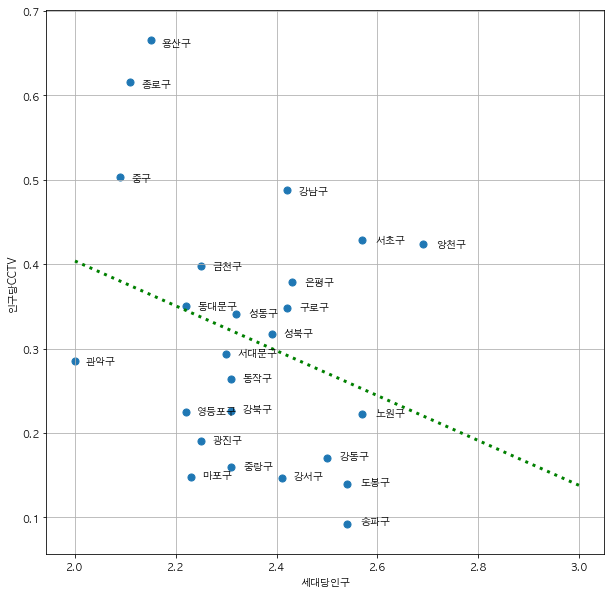

In [62]:
f1 = np.poly1d(fp1)

fx = np.linspace(2, 3, 10)

plt.figure(figsize=(10,10))
plt.scatter(data_result['세대당인구'], data_result['인구당CCTV'], s=50)

df_sort = data_result.sort_values(by ='인구당CCTV', ascending=False)
df_sort.head()

for n in range(25):
    #scatter가 찍힌 좌표에 적당히 거리를 조절하여 해당하는 데이터의 인덱스(df_sort.index[n])를 출력하기
    plt.text(df_sort['세대당인구'][n]*1.01, df_sort['인구당CCTV'][n] * 0.99, df_sort.index[n], fontsize=10)


plt.plot(fx, f1(fx), ls='dotted', lw=3, color='g')
plt.xlabel('세대당인구')
plt.ylabel('인구당CCTV')
plt.grid()
plt.show()

In [63]:
data_result['오차'] = np.abs(data_result['인구당CCTV'] - f1(data_result['세대당인구']))
df_sort = data_result.sort_values(by ='오차', ascending=False)
df_sort.head()


,소계,인구수,세대당인구,인구당CCTV,오차
구별,,,,,
용산구,1624,244203.0,2.15,0.665020,0.301219
종로구,1002,162820.0,2.11,0.615404,0.240970
양천구,2034,479978.0,2.69,0.423769,0.203502
강남구,2780,570500.0,2.42,0.487292,0.195257
마포구,574,389649.0,2.23,0.147312,0.195225


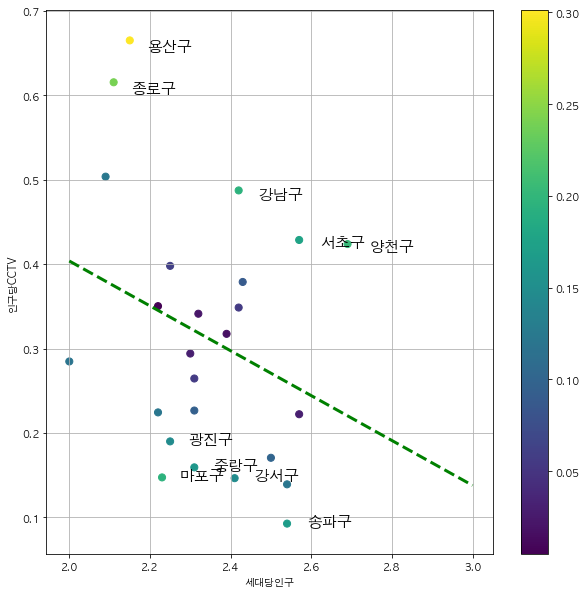

In [66]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['세대당인구'], data_result['인구당CCTV'], c= data_result['오차'],s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g') #x축 기준 인구수, y축 기준 CCTV 대수


for n in range(10):
    #scatter가 찍힌 좌표에 적당히 거리를 조절하여 해당하는 데이터의 인덱스(df_sort.index[n])를 출력하기
    plt.text(df_sort['세대당인구'][n]*1.02, df_sort['인구당CCTV'][n] * 0.98, df_sort.index[n], fontsize=15)

    
plt.xlabel('세대당인구')
plt.ylabel('인구당CCTV')
plt.colorbar()
plt.grid()
plt.show()

### 가설 평가

* 용산구, 종로구, 강남구, 서초구, 양천구가 세대당인구에 비해 CCTV가 많은 편
* 광진구, 중랑구, 마포구, 송파구, 강서구는 세대당인구에 비해 CCTV가 적은 편 


* 세대당인구가 아닌 1인가구 수 같은 게 있었으면 좀 더 의미있는 인사이트가 되었을 것...